In [27]:
import pandas as pd 
df = pd.read_csv("../found.csv")
df.head()

,peer,cid,filesAsStr
0,12D3KooWBA3FLioUQPqtj3RT4fxbquGNyb2hfQwXq8UTt5...,QmNb2LcaN8hzSNp4g7z8FtLsqvNyo3XDiR1gnDna1TWMqe,".git,README.md,main.py,"
1,12D3KooWGc7qCqwQvx9r96hwtmVhJSiXKK1qMFunXP3Kic...,QmUVTKsrYJpaxUT7dr9FpKq6AoKHhEM7eG1ZHGL56haKLG,"text/plain,"
2,12D3KooWQvVfZMKUaMeDBS7QPHL2APY4ANDPUzyaCSesos...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN
3,12D3KooWBFjLgj4rdUUfLdmXwrtVgrq5FiyjkxoJYQNVT5...,NaN,NaN
4,12D3KooWT1jCHWHYxtgsKvNqK6a3n2u5U9pfqjfWtjhdVL...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN


<Axes: xlabel='filesAsStr'>

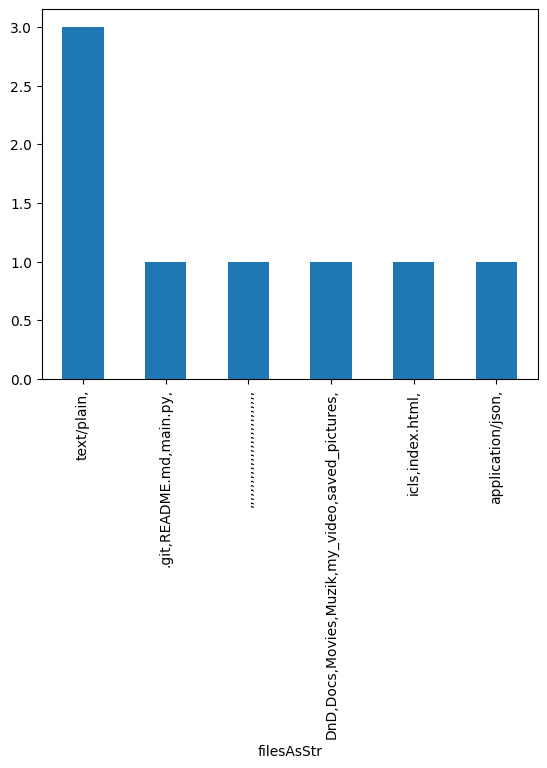

In [28]:
EMPTY_CID = "QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn"
total = len(df)
df["filesAsStr"].value_counts().plot.bar()

<Axes: xlabel='file'>

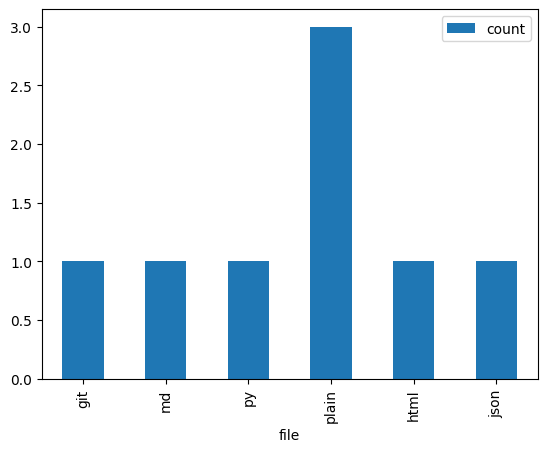

In [29]:
from collections import defaultdict
files = list(df["filesAsStr"][df["filesAsStr"].notnull()].values)
types_of_files = defaultdict(int) 
for file in files: 
    if "," in file: 
        for f in file.split(","):
            if "." in f: 
                types_of_files[f.split(".")[1]]+=1
            elif "/" in f: 
                types_of_files[f.split("/")[1]]+=1
    else:
        types_of_files[file] +=1 
temp = {
    "file":[],
    "count":[]
}
for k,v in types_of_files.items():
    temp["file"].append(k)
    temp["count"].append(v)
types_of_files = dict(types_of_files)
pd.DataFrame(temp).set_index("file").plot.bar()